In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data1 = pd.read_csv('Sample02-k-means.csv')
data1

,x,y
0,3,5
1,1,4
2,1,5
3,2,6
4,1,5
5,6,8
6,6,6
7,6,7
8,5,6
9,6,7


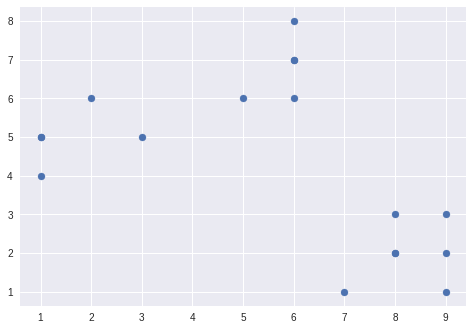

In [0]:
plt.scatter(data1['x'], data1['y'])
plt.show()

In [0]:
x1 = data1['x'].values
y1 = data1['y'].values

data2 = np.array(list(zip(x1, y1))).reshape(len(x1), 2)
data3 = []

K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(data2)
    
    d = cdist(data2, kmeanModel.cluster_centers_, 'euclidean')
    d2 = sum(np.min(d, axis = 1)) / data2.shape[0]
    data3.append(d2)

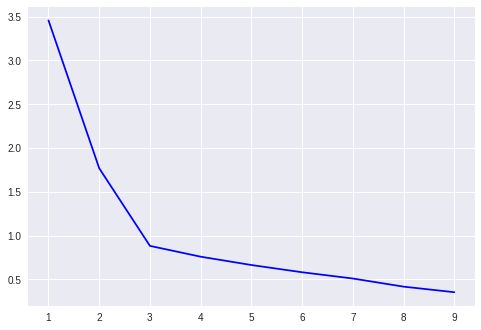

In [0]:
plt.plot(K, data3, 'bx-')
plt.show()

In [0]:
data4 = pd.read_csv("Sample01-k-means.csv")
data4.head(1)

,x,y
0,25,79


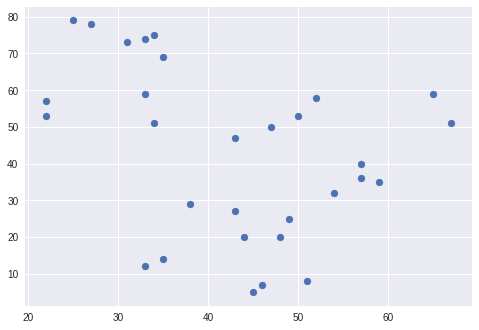

In [0]:
plt.scatter(data4['x'], data4['y'])
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 3).fit(data)
centroids = kmeans.cluster_centers_

In [0]:
plt.scatter(data['x'], data['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

---

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train_04_08.csv')
test = pd.read_csv('test_04_08.csv')

In [0]:
train.head()

In [0]:
train.describe()
train.fillna(train.mean(), inplace = True)

In [0]:
train.isnull().sum()

In [0]:
test.head()

In [0]:
test.describe()
test.fillna(test.mean(), inplace = True)

In [0]:
data_temp = \
    train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False)

data_temp2 = \
    train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

data_temp2

In [0]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', size = 2.2,
                    aspect = 1.6)

grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [0]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [0]:
train.head()

In [0]:
test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [0]:
test.head()

In [0]:
labelSex = LabelEncoder()
labelSex.fit(train['Sex'])
labelSex.fit(test['Sex'])

train['Sex'] = labelSex.transform(train['Sex'])
test['Sex'] = labelSex.transform(test['Sex'])

In [0]:
train.info()

In [0]:
test.info()

In [0]:
x = np.array(train.drop(['Survived'], 1).astype(float))

In [0]:
y = np.array(train['Survived'])

In [0]:
x.shape, y.shape

In [0]:
train.info()

In [0]:
pd.DataFrame(x).head()

In [0]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

In [0]:
correct = 0

for i in range(len(x)):
    predict_m = np.array(x[i].astype(float))
    predict_m = predict_m.reshape(-1, len(predict_m))
    prediction = kmeans.predict(predict_m)
    print(prediction)
    if prediction[0] == y[i]:
        correct += 1

In [0]:
print(correct/len(x))

In [0]:
data10 = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(x)
    data10.append(kmeanModel.inertia_)
    
plt.plot(K, data10, 'bx-')
plt.show()

In [0]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [0]:
x_scaled

In [0]:
correct = 0

for i in range(len(x)):
    predict_m = np.array(x[i].astype(float))
    predict_m = predict_m.reshape(-1, len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

---

In [0]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

---

In [0]:
ratings = pd.read_csv('ratings.csv')
movie_names = pd.read_csv('movies.csv')

In [0]:
ratings.head()

In [0]:
movie_names.head()

In [0]:
data = pd.merge(ratings, movie_names, on = "movieId")
data.head()

In [0]:
data.groupby('title')['rating'].mean().head()

In [0]:
data.groupby('title')['rating'].mean().sort_values(ascending = False).head()

In [0]:
data.groupby('title')['rating'].count().sort_values(ascending = False).head()

In [0]:
!pip install surprise

In [0]:
import surprise
max_value = data['rating'].max()
min_value = data['rating'].min()
max_value, min_value

In [0]:
reader = surprise.Reader(rating_scale = (0.5, 5.0))
data3 = ratings.iloc[:, [0, 1, 2]]
data4 = surprise.Dataset.load_from_df(data3, reader)

data4.df.head()

In [0]:
ssvd = surprise.SVDpp()
output = ssvd.fit(data4.build_full_trainset())

ssvd.predict(userId = 1, movieId = 1)
score = rResult.est
print(score)